### Support Vector Machine 

An implementation of Support Vector Machine algorithm on the Mushrooms data ser form <a href="https://archive.ics.uci.edu/ml/datasets/Mushroom">UCI Repository</a>. <br>
Experiments have been conducted to optimize the hyper-parameter C for soft margin SVMs, and kernel type.

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import numpy as np

### Data pre-processing

As the SVM cannot handle categorical variables, we need to convert them to dummy variables. 

In [3]:
# Conversion of the training dataset. 
df_train = pd.read_csv('.../noisy_train.ssv', sep='\s+', header=0,)
df_train["label"] = df_train.poisonous
df_train = df_train.drop(['poisonous'], axis=1)
df_train.drop('veiltype', axis=1, inplace=True)
df_train.head()
X_train = df_train.loc[:, df_train.columns != 'label']
X_train_enc = pd.get_dummies(X_train)
X_train_enc.head()


,capshape_b,capshape_c,capshape_f,capshape_k,capshape_s,capshape_x,capsurface_f,capsurface_g,capsurface_s,capsurface_y,...,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u
0,0,0,0,0,0,1,1,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0


In [4]:
# Conversion of the validation dataset. 

df_valid = pd.read_csv('.../noisy_valid.ssv', sep='\s+', header=0,)
df_valid["label"] = df_valid.poisonous
df_valid = df_valid.drop(['poisonous'], axis=1)
df_valid.drop('veiltype', axis=1, inplace=True)
df_valid.head()
X_valid = df_valid.loc[:, df_valid.columns != 'label']
X_valid_enc = pd.get_dummies(X_valid)
X_valid_enc["capshape_c"] = 0
X_valid_enc['capsurface_g'] = 0
X_valid_enc.head()

,capshape_b,capshape_f,capshape_k,capshape_s,capshape_x,capsurface_f,capsurface_s,capsurface_y,capcolor_b,capcolor_c,...,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,capshape_c,capsurface_g
0,0,0,0,0,1,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0
1,0,0,0,0,1,1,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,1,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,1,0,0,0,...,1,0,1,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,1,0,0,...,1,0,1,0,0,0,0,0,0,0


In [5]:
# Conversion of the test dataset. 

df_test = pd.read_csv('.../noisy_test.ssv', sep='\s+', header=1,)
df_test.head(20)
df_test["label"] = df_test.poisonous  
df_test = df_test.drop(['poisonous'], axis=1)
df_test.drop('veiltype', axis=1, inplace=True)
df_test.head()
X_test = df_test.loc[:, df_test.columns != 'label']
X_test_enc = pd.get_dummies(X_test)
X_test_enc.head()

,capshape_b,capshape_c,capshape_f,capshape_k,capshape_s,capshape_x,capsurface_f,capsurface_g,capsurface_s,capsurface_y,...,population_n,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u
0,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,1,0,0,0,0,0
3,0,0,0,0,0,1,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0


#### spliting labels and variables, converting into numpy arrays. 

In [6]:
X_train = X_train_enc.values
y_train = df_train.iloc[:, -1:].values

In [7]:
X_valid = X_valid_enc.values
y_valid = df_valid.iloc[:, -1:].values

In [8]:
X_test = X_test_enc.values
y_test = df_test.iloc[:, -1:].values

### Linear SVM 
classification using a linear SVM

In [9]:
linear_svm = SVC(kernel='linear', C=10000)
linear_svm.fit(X_train, y_train.ravel())

SVC(C=10000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [11]:
linear_svm.score(X_train, y_train)

0.9038546743464776

In [12]:
len(linear_svm.support_vectors_)

1474

In [13]:
# accuracy measure on the test set.

linear_svm_y_pred = linear_svm.predict(X_test)
accuracy_score(y_test, linear_svm_y_pred)

0.9049586776859504

#### Soft Margin linear SVM
classification using a soft margin linear svm, validation set is used to optimize the hyperparameter C and plot the impact of parameter C on the accuracy measure. 

In [182]:
# c_soft_params = {'C': [0.0001, 0.001, 0.01, 1, 10, 50, 100, 1000, 10000, 100000]}

In [121]:
c_soft_params = {'C': [x for x in np.arange(0.01,10,0.01)]}

In [122]:
Soft_margin_model = SVC(kernel='linear')
Soft_margin_grid = GridSearchCV(Soft_margin_model, c_soft_params, cv=[(slice(None), slice(None))])
Soft_margin_grid.fit(X_valid, y_valid.ravel())

GridSearchCV(cv=[(slice(None, None, None), slice(None, None, None))],
       error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.01, 0.02, 0.03, 0.04, 0.05, 0.060000000000000005, 0.06999999999999999, 0.08, 0.09, 0.09999999999999999, 0.11, 0.12, 0.13, 0.14, 0.15000000000000002, 0.16, 0.17, 0.18000000000000002, 0.19, 0.2, 0.21000000000000002, 0.22, 0.23, 0.24000000000000002, 0.25, 0.26, 0.27, 0.28, 0.2900000....83, 9.84, 9.85, 9.86, 9.87, 9.88, 9.89, 9.9, 9.91, 9.92, 9.93, 9.94, 9.95, 9.96, 9.97, 9.98, 9.99]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [123]:
Soft_margin_grid.best_score_

0.8913171884229178

In [124]:
Soft_margin_grid.best_params_

{'C': 0.19}

/home/mahsan/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


(0, 0.2)

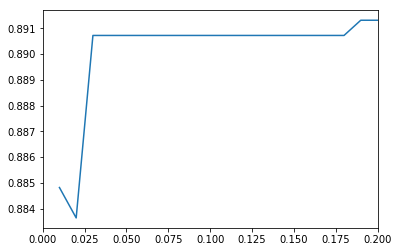

In [125]:
Soft_linear_accuracies = list(Soft_margin_grid.cv_results_["mean_train_score"])
Soft_linear_Cs = c_soft_params['C']
plt.plot(Soft_linear_Cs, Soft_linear_accuracies)
plt.xlim(0, 0.2)

In [14]:
Soft_margin_model_tarin = SVC(kernel='linear', C=0.19)
Soft_margin_model_tarin.fit(X_train, y_train.ravel())

SVC(C=0.19, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [15]:
Soft_margin_model_tarin.score(X_train, y_train)

0.9038546743464776

In [16]:
len(Soft_margin_model_tarin.support_vectors_)

777

In [17]:
Soft_margin_model_y_pred = Soft_margin_model_tarin.predict(X_test)
accuracy_score(y_test, Soft_margin_model_y_pred)

0.9049586776859504

#### Kernel SVM 
using rbf and polynomial kernels in a non-linear SVM

In [38]:
rbf_kernel = {'kernel':['rbf'],
                'gamma': [1e-3, 1e-2,1e-3, 1, 10, 100],
                }

In [92]:
rbf_SVM = SVC(C=1000000)
rbf_gridsearch = GridSearchCV(rbf_SVM, rbf_kernel, cv=[(slice(None), slice(None))])
rbf_gridsearch.fit(X_valid, y_valid.ravel())

GridSearchCV(cv=[(slice(None, None, None), slice(None, None, None))],
       error_score='raise-deprecating',
       estimator=SVC(C=1000000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'kernel': ['rbf'], 'gamma': [0.001, 0.01, 0.001, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [93]:
rbf_gridsearch.best_params_

{'gamma': 0.01, 'kernel': 'rbf'}

In [94]:
rbf_gridsearch.best_score_

1.0

In [19]:
rbf_Svm_tuned = SVC(kernel='rbf', C=1000000 , gamma=0.01 )
rbf_Svm_tuned.fit(X_train, y_train)
rbf_Svm_tuned.score(X_train, y_train.ravel())

/home/mahsan/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.0

In [130]:
len(rbf_Svm_tuned.support_vectors_)

736

In [21]:
rbf_Svm_tuned_y_pred = rbf_Svm_tuned.predict(X_test)
accuracy_score(y_test, rbf_Svm_tuned_y_pred)

0.7827626918536009

In [99]:
poly_kernel = {'kernel':['poly'],
                'degree': [2, 3, 4, 5, 6],
                }

In [100]:
poly_SVM = SVC(C=1000000)
poly_gridsearch = GridSearchCV(poly_SVM, poly_kernel, cv=[(slice(None), slice(None))])
poly_gridsearch.fit(X_valid, y_valid.ravel())

/home/mahsan/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/mahsan/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/mahsan/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/mahsan/anaconda3/lib/python3.7/site-packages/skle

GridSearchCV(cv=[(slice(None, None, None), slice(None, None, None))],
       error_score='raise-deprecating',
       estimator=SVC(C=1000000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'kernel': ['poly'], 'degree': [2, 3, 4, 5, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [105]:
poly_gridsearch.best_params_

{'degree': 3, 'kernel': 'poly'}

In [109]:
poly_gridsearch.best_score_

1.0

In [22]:
poly_Svm_tuned = SVC(kernel='poly', C=1000000 , degree=3 )
poly_Svm_tuned.fit(X_train, y_train)
poly_Svm_tuned.score(X_train, y_train.ravel())

/home/mahsan/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/mahsan/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


1.0

In [139]:
len(poly_Svm_tuned.support_vectors_)

738

In [140]:
poly_Svm_tuned.score(X_test, y_test)

0.7857142857142857

In [24]:
poly_Svm_tuned_y_pred = poly_Svm_tuned.predict(X_test)
accuracy_score(y_test, poly_Svm_tuned_y_pred)

0.7857142857142857

#### Soft margin, non-linear SVM 
using the polynomial kernel to optimize the hyper-parameter C in the classification process. 

In [112]:
C_param = {'C': [1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7,1e8, 1e9, 1e10]}

In [85]:
Kernel_Soft_margin = SVC(kernel='poly', degree=3)
Kernel_Soft_margin_grid = GridSearchCV(Kernel_Soft_margin, C_param, cv=[(slice(None), slice(None))])
Kernel_Soft_margin_grid.fit(X_valid, y_valid.ravel())


/home/mahsan/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/mahsan/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/mahsan/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/home/mahsan/anaconda3/lib/python3.7/site-packages/skle

GridSearchCV(cv=[(slice(None, None, None), slice(None, None, None))],
       error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10.0, 100.0, 1000.0, 10000.0, 100000.0, 1000000.0, 10000000.0, 100000000.0, 1000000000.0, 10000000000.0]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [86]:
Kernel_Soft_margin_grid.best_params_

{'C': 100000.0}

In [87]:
Kernel_Soft_margin_grid.best_score_

1.0

In [25]:
Kernel_Soft_margin_tuned = SVC(kernel='poly', C=100000.0 , degree=3 )
Kernel_Soft_margin_tuned.fit(X_train, y_train)
Kernel_Soft_margin_tuned.score(X_train, y_train.ravel())

/home/mahsan/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/mahsan/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.9937970757642889

In [132]:
len(Kernel_Soft_margin_tuned.support_vectors_)

762

In [26]:
Kernel_Soft_margin_tuned_y_pred = Kernel_Soft_margin_tuned.predict(X_test)
accuracy_score(y_test, Kernel_Soft_margin_tuned_y_pred)

0.7933884297520661

(1000.0, 1000000.0)

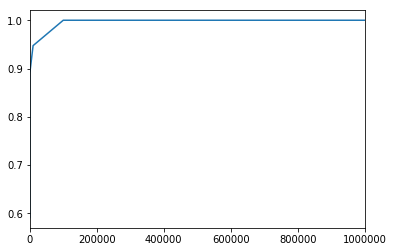

In [135]:
Soft_poly_tuned_accuracies = list(Kernel_Soft_margin_grid.cv_results_["mean_train_score"])
Soft_poly_Cs = C_param['C']
plt.plot(Soft_poly_Cs, Soft_poly_tuned_accuracies)
plt.xlim(1e3, 1e6)

The high dimensionality of the dataset can be considered as the main problem in this classification task. Since all variables in the dataset are categorical, converting them into dummy variables increases dimensionality, resulting in the increase of computation. 